In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

from pathlib import Path


# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [ ]:
# Create engine using the `hawaii.sqlite` database file
database_path = Path("../Resources/hawaii.sqlite")
engine = create_engine(f"sqlite:///{database_path}")


In [ ]:
# Declare a Base using `automap_base()`
Base = automap_base()


# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine, reflect=True)


In [ ]:
# Print all of the classes mapped to the Base
Base.classes.keys()

In [ ]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date in the data set: {recent_date[0]}")

Most recent date in the data set: 2017-08-23


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

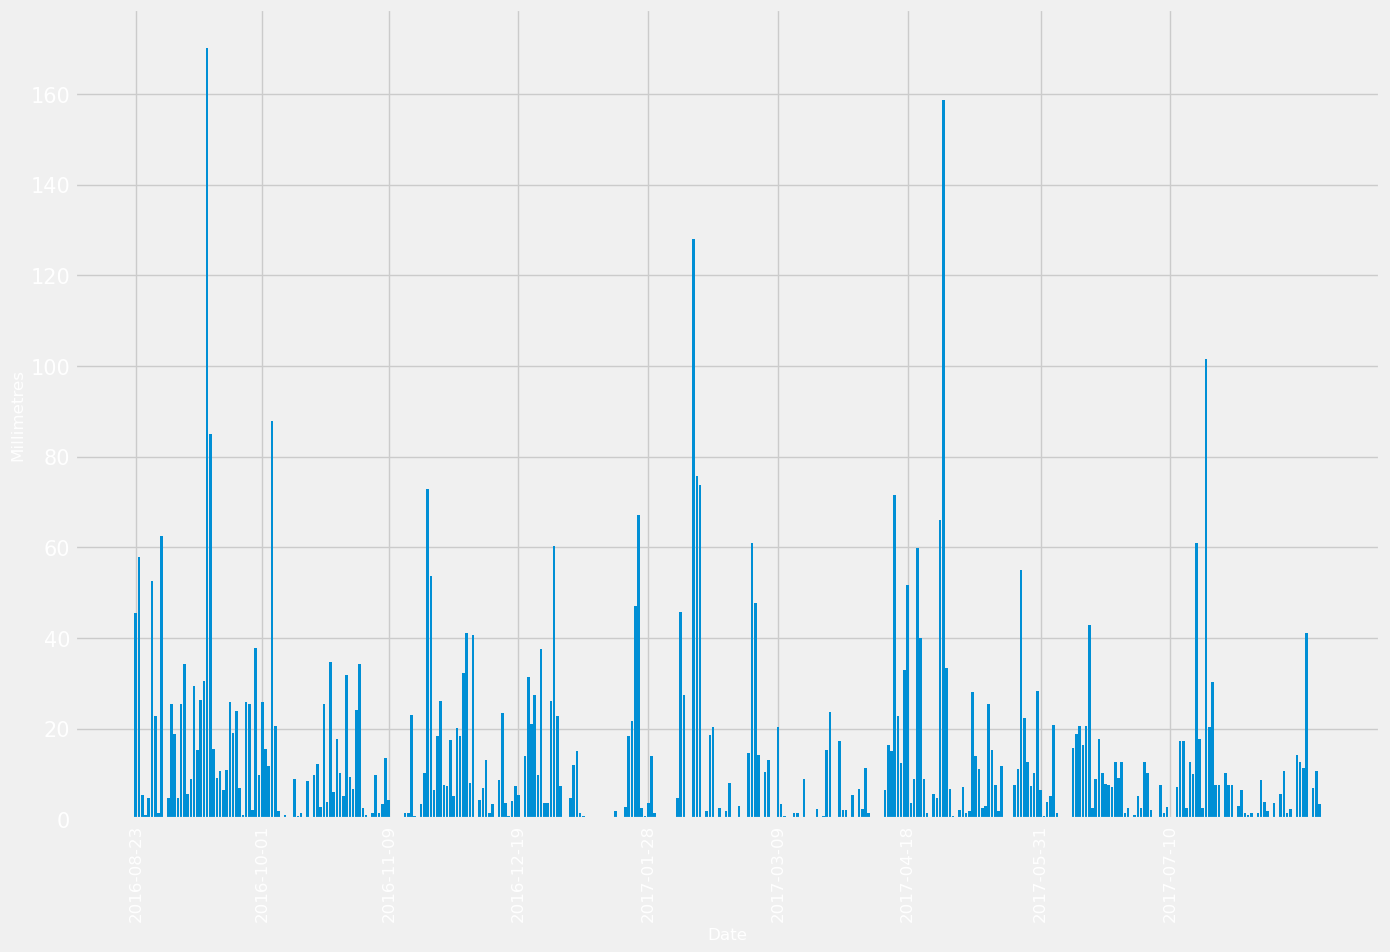

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
last_date = session.query(func.max(Measurement.date)).scalar()

# Calculate the date one year from the last date in data set.
date_one_yr_ago_dt = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_date = date_one_yr_ago_dt.strftime('%Y-%m-%d')

last_year_precipitation = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_precipitation_df = pd.DataFrame(last_year_precipitation, columns=['Date','Precipitation'])

# Sort the dataframe by date

last_year_precipitation_df.set_index('Date', inplace=True)
last_year_precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(15, 10))
plt.bar(last_year_precipitation_df.index, last_year_precipitation_df['Precipitation'])

#plt.legend(['Precipitation'], loc="upper right",fontsize=15)

# set x location
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 

# xticks
plt.xticks(xloc, rotation='vertical',fontsize=12)

# Labels
plt.xlabel('Date', fontsize=12)
plt.ylabel("Millimetres",fontsize=12)
plt.yticks(size=15)

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_precipitation_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()
